# Rank Features of a Smartphone-Build a python Application to Classify and Rank Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings ('ignore')

In [4]:
sm=pd.read_csv(r'C:\Users\HP\Downloads\MobileTrain.csv')

In [5]:
sm.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
smt=pd.read_csv(r'C:\Users\HP\Downloads\MobileTest.csv')

In [7]:
smt.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
sm.shape

(2000, 21)

In [9]:
smt.shape

(1000, 21)

In [10]:
sm.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
smt.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [12]:
sm.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
smt.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [14]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

<AxesSubplot:>

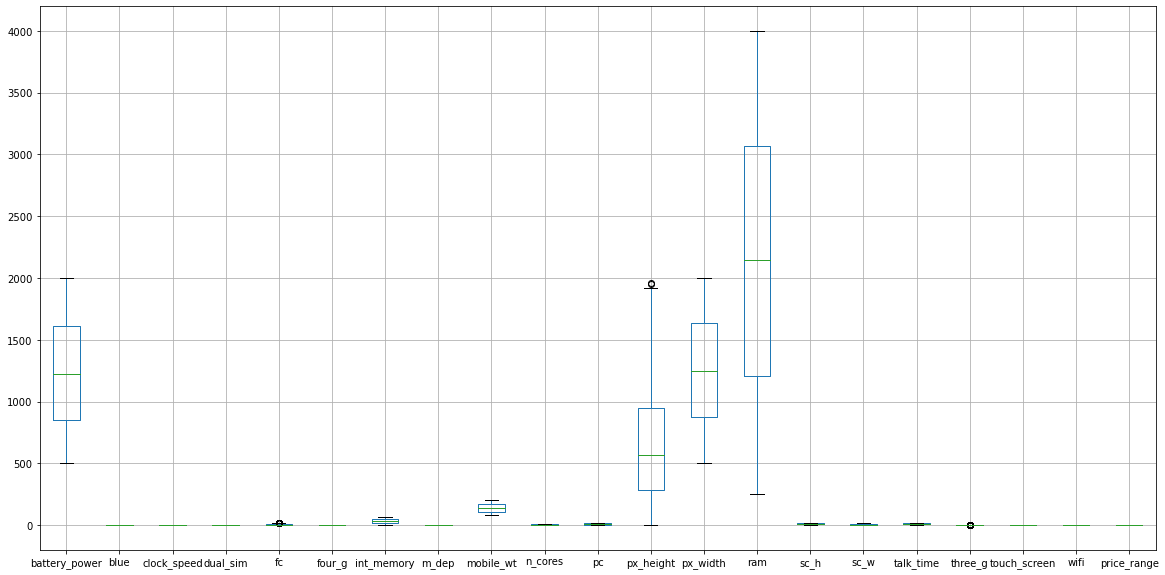

In [16]:
plt.figure(figsize=(20,10))
sm.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x23accb1c490>,
 'caps': [<matplotlib.lines.Line2D at 0x23accb1ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x23accb1c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23accb1cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23accab02e0>],
 'means': []}

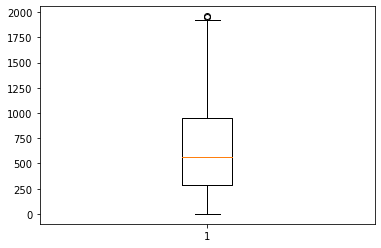

In [17]:
plt.boxplot(sm['px_height'])

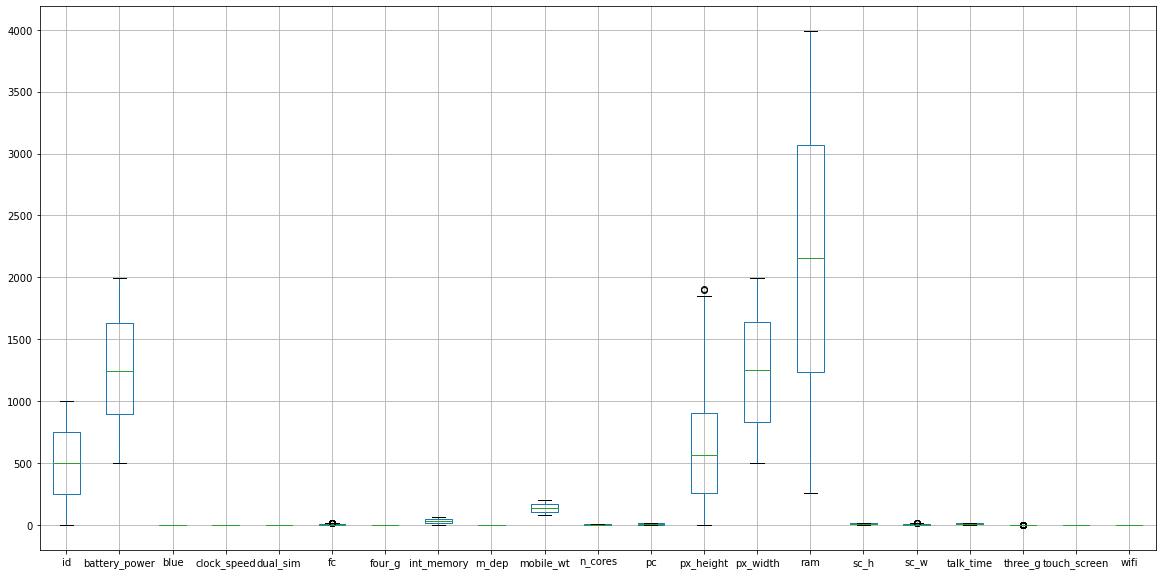

In [18]:
plt.figure(figsize=(20,10))
smt.boxplot()
plt.savefig('images/int_out.png',dpi=300)

{'whiskers': [<matplotlib.lines.Line2D at 0x23accdc91f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23accdc9790>,
 'boxes': [<matplotlib.lines.Line2D at 0x23accdc9040>],
 'medians': [<matplotlib.lines.Line2D at 0x23accdc9d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23accdcb040>],
 'means': []}

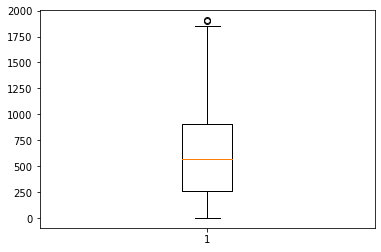

In [19]:
plt.boxplot(smt['px_height'])

There are few outlier values present in the feature 'px_height' . we consider those values for furthur processing.

In [20]:
sm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
smt.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## EDA UNIVARIATE


In [22]:
sm.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

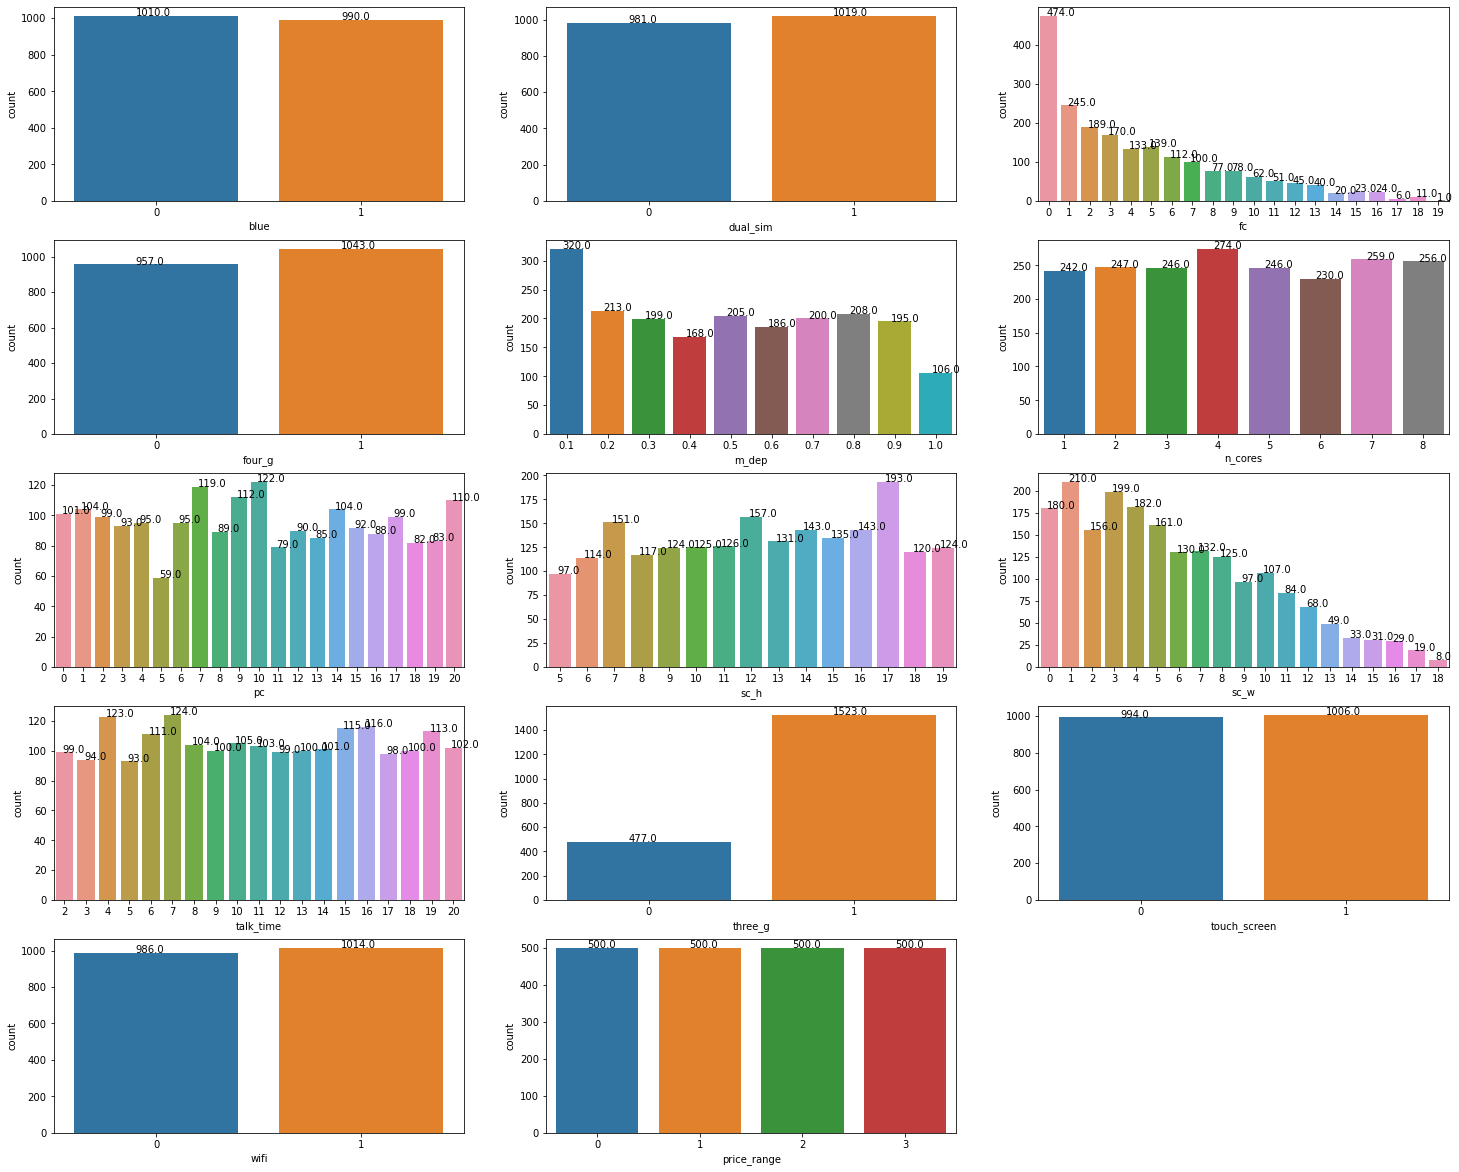

In [23]:
plt.figure(figsize=(25,25))
j=1
sns.countplot(sm['blue'])
for i in ['blue','dual_sim','fc','four_g','m_dep','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']:
    plt.subplot(6,3,j)
    ax=sns.countplot(sm[i])
    j=j+1
    for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01))
plt.savefig('images/int_count.png',dpi=300)

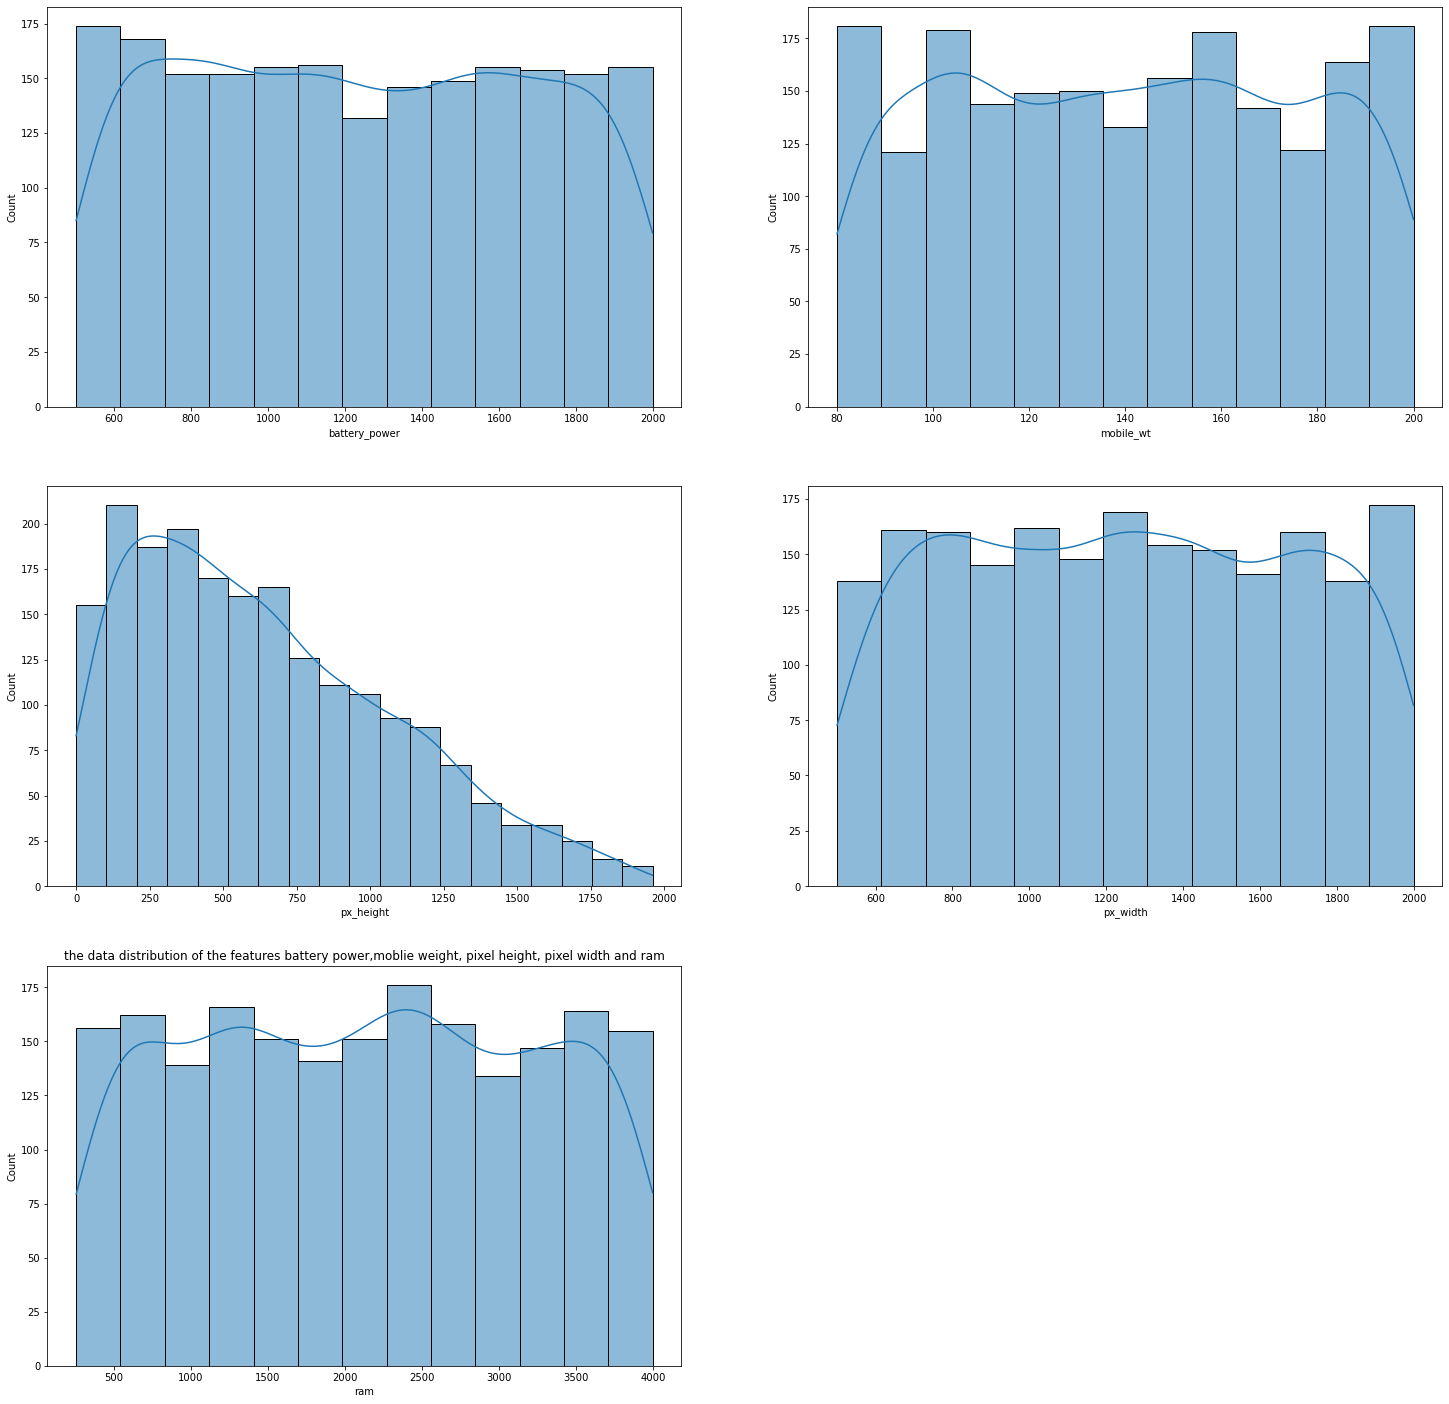

In [24]:
plt.figure(figsize=(25,25))
j=1
for i in ['battery_power','mobile_wt','px_height','px_width','ram']:
    plt.subplot(3,2,j)
    sns.histplot(sm[i],kde=True)
    j=j+1
plt.title("the data distribution of the features battery power,moblie weight, pixel height, pixel width and ram")
plt.savefig('images/int_his.png',dpi=300)

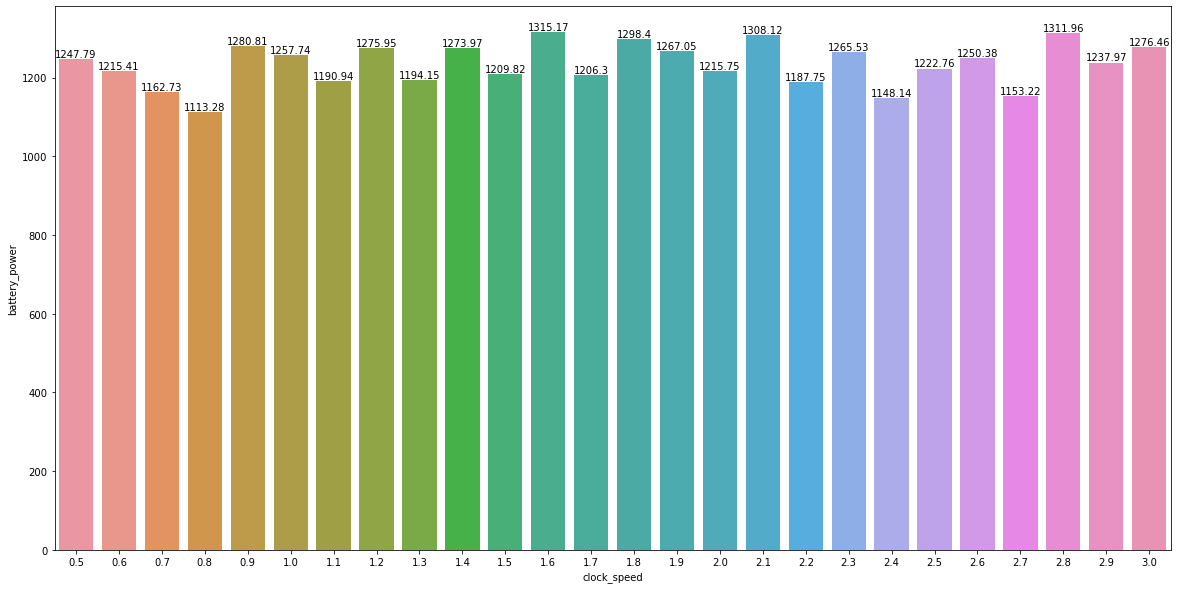

In [25]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='clock_speed',y='battery_power',data=sm,ci=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('images/int_clock.png',dpi=300)

In [26]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

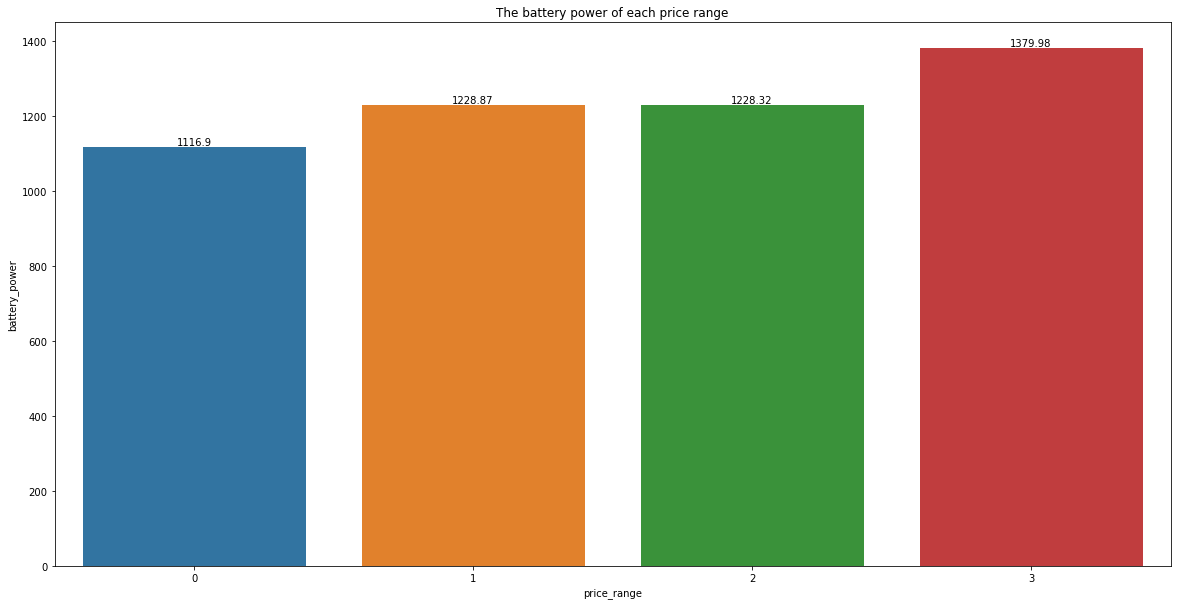

In [27]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='price_range',y='battery_power',data=sm,ci=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("The battery power of each price range")
plt.savefig('images/int_priceran.png',dpi=300)

As power of battery power increases the price range increases.

In [28]:
sm

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [29]:
ts=sm['touch_screen'].value_counts()

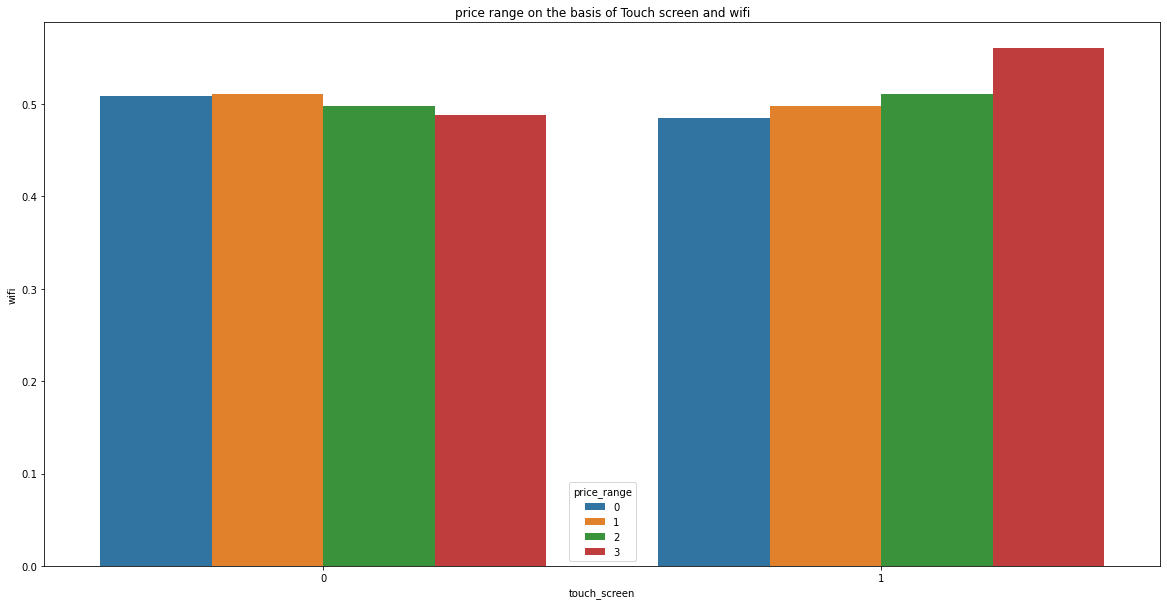

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='touch_screen',y='wifi',hue='price_range',data=sm,ci=None)
plt.title('price range on the basis of Touch screen and wifi')
plt.savefig('images/int_prwifi.png',dpi=300)

Touch screen with wifi has included in large price range

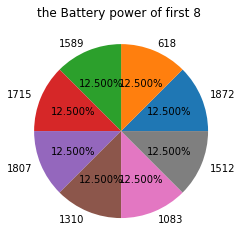

In [31]:
bp=sm['battery_power'].value_counts().sort_values(ascending=True)
bpi=sm['battery_power'].value_counts().index
plt.pie(bp[:8],labels=bpi[:8],autopct='%1.3f%%')
plt.title("the Battery power of first 8 ")
plt.savefig('images/int_battery.png',dpi=300)

In [32]:
ss=sm[sm['price_range']==3]

In [33]:
ss

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3


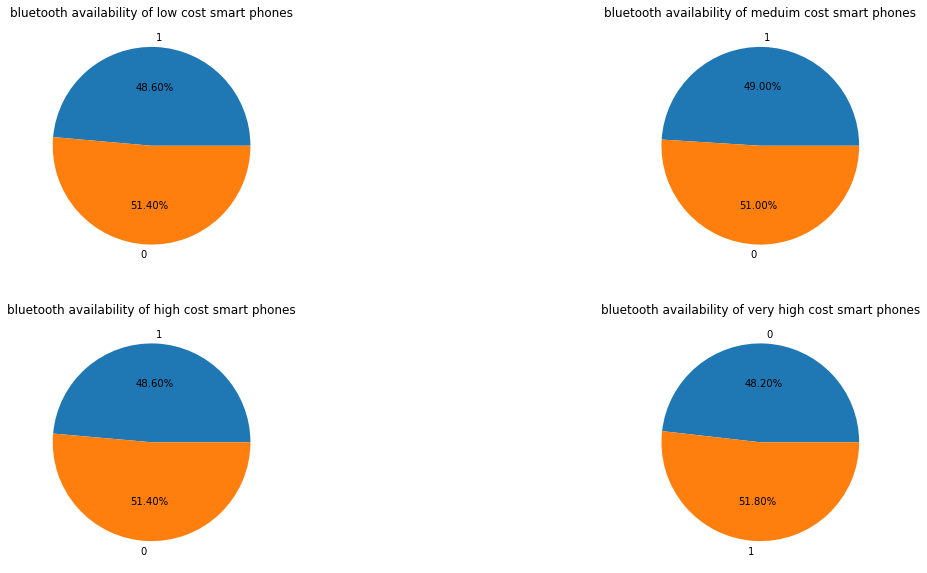

In [34]:
j=1
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,j)
    j=j+1
    plt.title("bluetooth availability of ")
    if i==0:
        plt.title("bluetooth availability of low cost smart phones")
    elif i==1:
        plt.title("bluetooth availability of meduim cost smart phones")
    elif i==2:
        plt.title("bluetooth availability of high cost smart phones")
    else:
        plt.title("bluetooth availability of very high cost smart phones")
    frex=sm[sm['price_range']==i].groupby('blue')[['blue']].value_counts().sort_values(ascending=True)
    frexi=frex.index
    plt.pie(frex[:10],labels=frexi[:10],autopct='%1.2f%%')
plt.savefig('images/int_pblue.png',dpi=300)

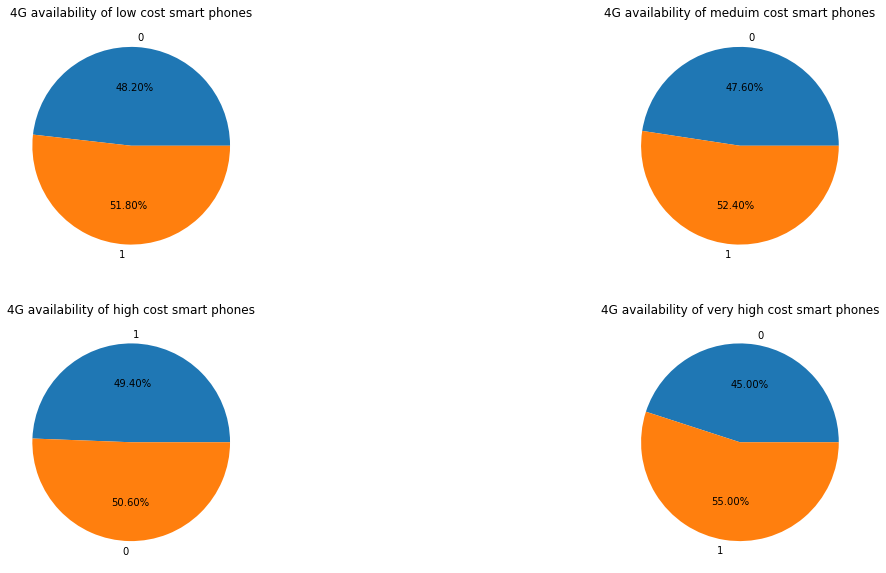

In [35]:
j=1
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,j)
    j=j+1
    if i==0:
        plt.title("4G availability of low cost smart phones")
    elif i==1:
        plt.title("4G availability of meduim cost smart phones")
    elif i==2:
        plt.title("4G availability of high cost smart phones")
    else:
        plt.title("4G availability of very high cost smart phones")
    frex=sm[sm['price_range']==i].groupby('four_g')[['four_g']].value_counts().sort_values(ascending=True)
    frexi=frex.index
    plt.pie(frex[:10],labels=frexi[:10],autopct='%1.2f%%')
plt.savefig('images/int_pr4g.png',dpi=300)

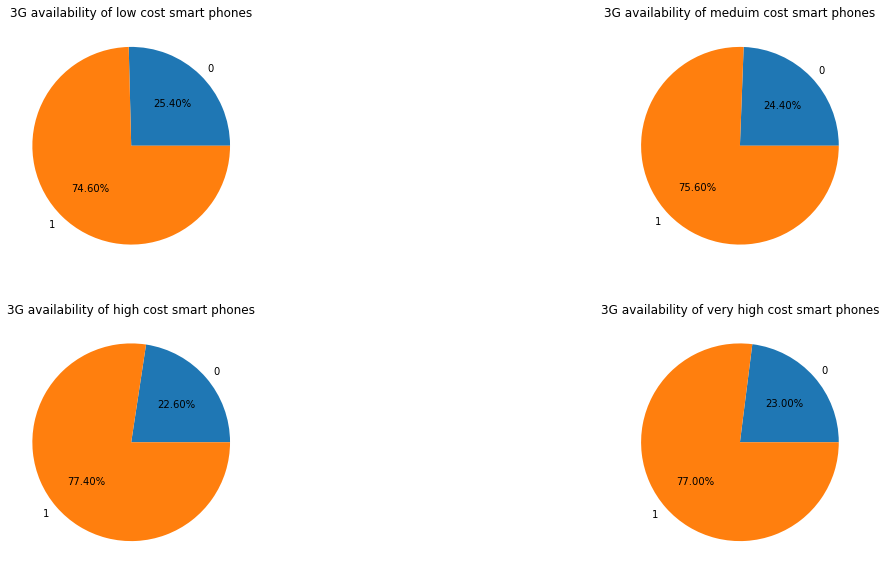

In [36]:
j=1
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,j)
    j=j+1
    if i==0:
        plt.title("3G availability of low cost smart phones")
    elif i==1:
        plt.title("3G availability of meduim cost smart phones")
    elif i==2:
        plt.title("3G availability of high cost smart phones")
    else:
        plt.title("3G availability of very high cost smart phones")
    frex=sm[sm['price_range']==i].groupby('three_g')[['three_g']].value_counts().sort_values(ascending=True)
    frexi=frex.index
    plt.pie(frex[:10],labels=frexi[:10],autopct='%1.2f%%')
plt.savefig('images/int_3g.png',dpi=300)

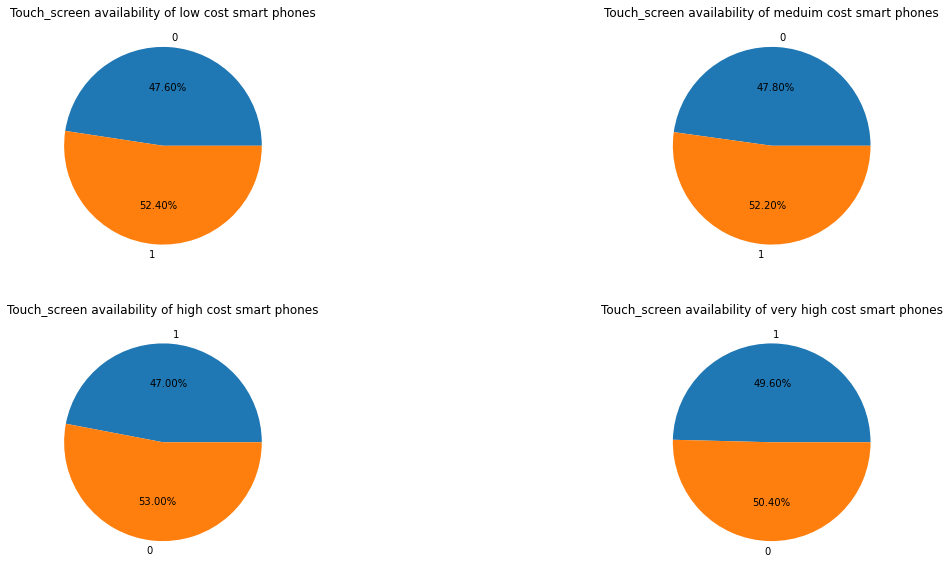

In [37]:
j=1
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,j)
    j=j+1
    if i==0:
        plt.title("Touch_screen availability of low cost smart phones")
    elif i==1:
        plt.title("Touch_screen availability of meduim cost smart phones")
    elif i==2:
        plt.title("Touch_screen availability of high cost smart phones")
    else:
        plt.title("Touch_screen availability of very high cost smart phones")
    frex=sm[sm['price_range']==i].groupby('touch_screen')[['touch_screen']].value_counts().sort_values(ascending=True)
    frexi=frex.index
    plt.pie(frex[:10],labels=frexi[:10],autopct='%1.2f%%')
plt.savefig('images/int_touch.png',dpi=300)

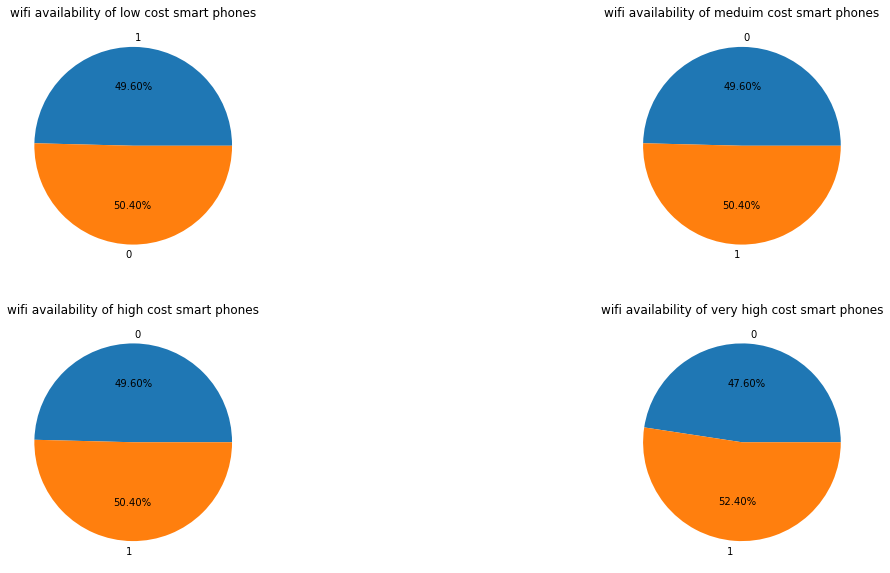

In [38]:
j=1
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,j)
    j=j+1
    if i==0:
        plt.title("wifi availability of low cost smart phones")
    elif i==1:
        plt.title("wifi availability of meduim cost smart phones")
    elif i==2:
        plt.title("wifi availability of high cost smart phones")
    else:
        plt.title("wifi availability of very high cost smart phones")
    frex=sm[sm['price_range']==i].groupby('wifi')[['wifi']].value_counts().sort_values(ascending=True)
    frexi=frex.index
    plt.pie(frex[:10],labels=frexi[:10],autopct='%1.2f%%')
plt.savefig('images/int_wifi.png',dpi=300)

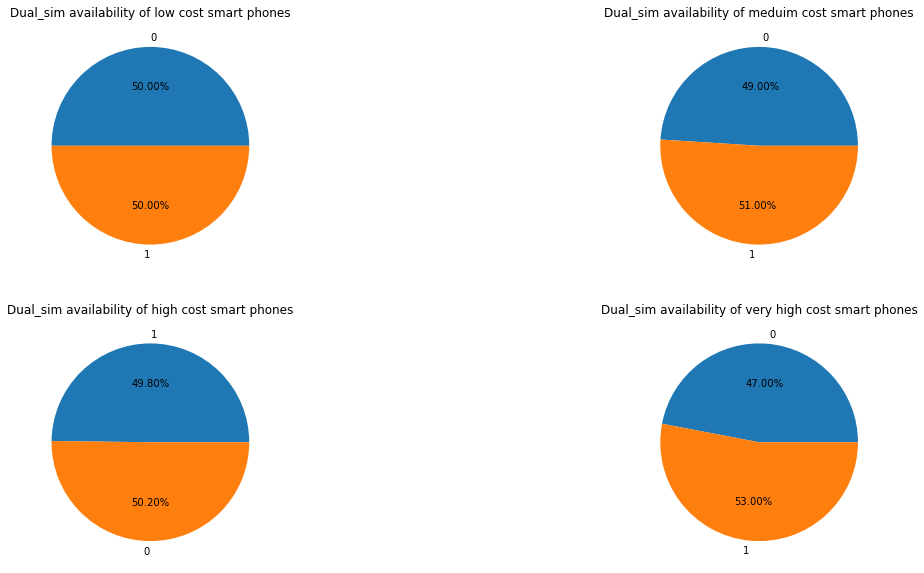

In [39]:
j=1
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,j)
    j=j+1
    if i==0:
        plt.title("Dual_sim availability of low cost smart phones")
    elif i==1:
        plt.title("Dual_sim availability of meduim cost smart phones")
    elif i==2:
        plt.title("Dual_sim availability of high cost smart phones")
    else:
        plt.title("Dual_sim availability of very high cost smart phones")
    frex=sm[sm['price_range']==i].groupby('dual_sim')[['dual_sim']].value_counts().sort_values(ascending=True)
    frexi=frex.index
    plt.pie(frex[:10],labels=frexi[:10],autopct='%1.2f%%')
plt.savefig('images/int_dual.png',dpi=300)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

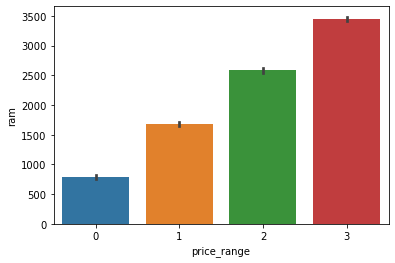

In [40]:
plt.figure()
sns.barplot(y="ram", x="price_range", data=sm)

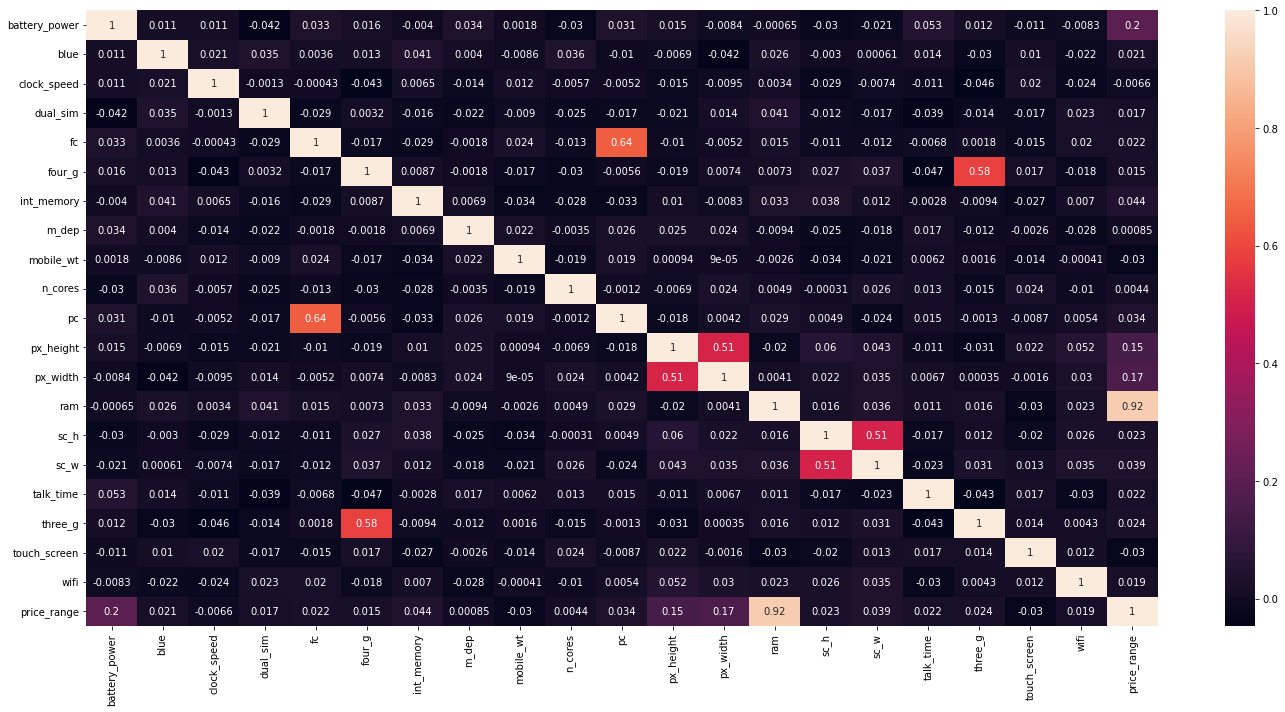

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(sm.corr(),annot=True)
plt.tight_layout()
plt.savefig('images/corr1.png',dpi=300)

Ram is highly correlated with price range

# Classify dataset into software and hardware features

In [42]:
# Software features
sm1 = sm.loc[:,['battery_power','blue','four_g','mobile_wt','n_cores','px_height','px_width','price_range','talk_time','three_g','wifi','clock_speed']]
sm1

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed
0,842,0,0,188,2,20,756,1,19,0,1,2.2
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,0,0.5
1996,1965,1,0,187,4,915,1965,2,16,1,1,2.6
1997,1911,0,1,108,8,868,1632,3,5,1,0,0.9
1998,1512,0,1,145,5,336,670,0,19,1,1,0.9


In [43]:
#Hardware faetures
sm2 = sm.loc[:,['dual_sim','fc','m_dep','int_memory','pc','ram','sc_h','sc_w','touch_screen']]
sm2

,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,0,1,0.6,7,2,2549,9,7,0
1,1,0,0.7,53,6,2631,17,3,1
2,1,2,0.9,41,6,2603,11,2,1
3,0,0,0.8,10,9,2769,16,8,0
4,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.8,2,14,668,13,4,1
1996,1,0,0.2,39,3,2032,11,10,1
1997,1,1,0.7,36,3,3057,9,1,1
1998,0,4,0.1,46,5,869,18,10,1


In [46]:

x=sm.drop(['price_range'],axis=1)
y=sm['price_range']

In [47]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sm_scaled=scaler.fit_transform(x)
sm_scaled=pd.DataFrame(sm_scaled)
sm_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-1.927347e-16,-2.172151e-16,3.990142e-16,9.230117e-17,-2.048361e-16,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16,2.184919e-16,3.065326e-16,4.278800e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [48]:
#Spliting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0,test_size=0.25)

In [49]:
x_train.shape

(1500, 20)

In [50]:
x_test.shape

(500, 20)

In [51]:
y_train.shape

(1500,)

In [52]:
y_test.shape

(500,)

# Predictive Modelling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

## Logistic Regression

In [55]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lm=logit_model.predict(x_test)
print("Accuracy is ",accuracy_score(y_test,y_pred_lm))
print("Precision score is ",precision_score(y_test,y_pred_lm,average='macro'))
print("Recall score is ",recall_score(y_test,y_pred_lm,average='macro'))
print("f1 score is ",f1_score(y_test,y_pred_lm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_lm))

Accuracy is  0.65
Precision score is  0.6474434941056981
Recall score is  0.646164202075664
f1 score is  0.6466627209578788
Confusion Matrix 
 [[104  18   2   0]
 [ 17  63  25   5]
 [  0  33  58  34]
 [  0   2  39 100]]


## Decision Tree Algorithm

In [56]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
print("Accuracy is ",accuracy_score(y_test,y_pred_dt))
print("Precision score is ",precision_score(y_test,y_pred_dt,average='macro'))
print("Recall score is ",recall_score(y_test,y_pred_dt,average='macro'))
print("f1 score is ",f1_score(y_test,y_pred_dt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_dt))

Accuracy is  0.796
Precision score is  0.7925498599002847
Recall score is  0.7916343150100871
f1 score is  0.7920598612028982
Confusion Matrix 
 [[113  11   0   0]
 [ 10  78  22   0]
 [  0  18  86  21]
 [  0   1  19 121]]


## Random Forest Model

In [57]:
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)
print("Accuracy is ",accuracy_score(y_test,y_pred_rt))
print("Precision score is ",precision_score(y_test,y_pred_rt,average='macro'))
print("Recall score is ",recall_score(y_test,y_pred_rt,average='macro'))
print("f1 score is ",f1_score(y_test,y_pred_rt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_rt))

Accuracy is  0.872
Precision score is  0.868019093343384
Recall score is  0.8689638734635302
f1 score is  0.8682637503047257
Confusion Matrix 
 [[122   2   0   0]
 [  8  89  13   0]
 [  0  16  96  13]
 [  0   0  12 129]]


## Naive Bayes Algorithm

In [58]:
from sklearn.naive_bayes import MultinomialNB
cl=MultinomialNB().fit(x_train,y_train)
y_pred_m=cl.predict(x_test)
print("Accuracy is ",accuracy_score(y_test,y_pred_m))
print("Precision score is ",precision_score(y_test,y_pred_m,average='macro'))
print("Recall score is ",recall_score(y_test,y_pred_m,average='macro'))
print("f1 score is ",f1_score(y_test,y_pred_m,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_m))

Accuracy is  0.53
Precision score is  0.5048177002658808
Recall score is  0.5189739086125497
f1 score is  0.5081070751330281
Confusion Matrix 
 [[ 95  22   7   0]
 [ 30  38  26  16]
 [  4  29  31  61]
 [  0   7  33 101]]


## KNN Algorithm

In [59]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.924,
 0.916,
 0.924,
 0.938,
 0.946,
 0.944,
 0.942,
 0.946,
 0.942,
 0.95,
 0.946,
 0.948]

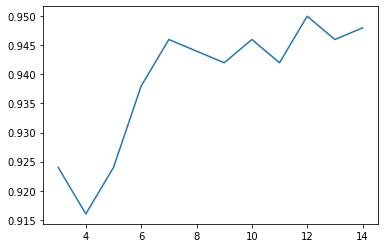

In [60]:
plt.plot(neighbours,acc_values)

In [61]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [62]:
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("f1 score is ",f1_score(y_test,y_pred,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))

Accuracy is  0.946
f1 score is  0.9455823300122037
Confusion Matrix 
 [[124   0   0   0]
 [  5 102   3   0]
 [  0   5 114   6]
 [  0   0   8 133]]


## SVM Algorithm

In [63]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm=svm_linear.predict(x_test)
print("Accuracy is ",accuracy_score(y_test,y_pred_svm))
print("f1 score is ",f1_score(y_test,y_pred_svm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_svm))

Accuracy is  0.978
f1 score is  0.9777921217787977
Confusion Matrix 
 [[123   1   0   0]
 [  1 107   2   0]
 [  0   2 122   1]
 [  0   0   4 137]]


Accuracy is high in SVM Model. 

In [65]:
smt.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [66]:
sm_test=smt.drop("id",axis=1)

In [67]:
smt_scaled=scaler.fit_transform(sm_test)
smt_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [68]:
preds = svm_linear.predict(sm_test)
print("predicted value using SVC Model : ",preds[:20])
print("actual values  : ",y_test[:20].values)

predicted value using SVC Model :  [3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2]
actual values  :  [3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1]


# Ranking Features of the smart phone

In [69]:
sm["rank_by_price"]=sm["price_range"].rank()
sm1=sm
sm1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [70]:
sm1["rank_by_price"]=sm1["rank_by_price"].sort_values()
sm1


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [71]:
sm1.sort_values(by=["rank_by_price"])



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [72]:
RankedData = sm1.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [73]:
r= sm1
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
